In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.svm import SVC 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
red_wines['target'] = np.where(red_wines['quality']<=5,0,1)

In [4]:
target = red_wines['target']
target_names = ["bad quality","good quality"]

In [5]:
data = red_wines.drop(['quality', 'target'], axis=1)
feature_names = data.columns

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_scaler= MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
model=SVC(C=1, kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [11]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.749791492910759
Testing Data Score: 0.73


In [12]:
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

 bad quality       0.67      0.77      0.72       178
good quality       0.79      0.70      0.74       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



below code from applied machine learning course on linkedin

In [13]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [14]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.739 (+/-0.091) for {'C': 0.1, 'kernel': 'linear'}
0.613 (+/-0.042) for {'C': 0.1, 'kernel': 'rbf'}
0.748 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.625 (+/-0.037) for {'C': 1, 'kernel': 'rbf'}
0.746 (+/-0.093) for {'C': 10, 'kernel': 'linear'}
0.706 (+/-0.076) for {'C': 10, 'kernel': 'rbf'}


## Testing with best features and parameters

Feature: 0, Score: 1.34296
Feature: 1, Score: -2.74269
Feature: 2, Score: -0.43116
Feature: 3, Score: 0.36623
Feature: 4, Score: -1.21339
Feature: 5, Score: 0.86760
Feature: 6, Score: -2.50943
Feature: 7, Score: -0.75241
Feature: 8, Score: 0.07252
Feature: 9, Score: 2.57254
Feature: 10, Score: 4.83636


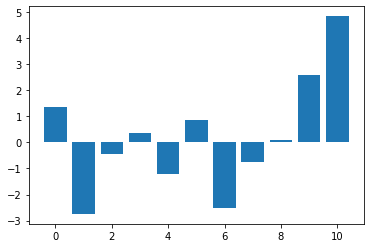

In [15]:

from matplotlib import pyplot

# # get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [16]:
list(red_wines.columns.values)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'target']

In [17]:
# using 5 parameters we have determined may result with better results:
target2 = red_wines['target']
target_names2 = ["bad quality","good quality"]

In [18]:
data2 = red_wines.drop(['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','quality','target'], axis=1)
feature_names2 = data2.columns

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, random_state=42)

In [20]:
X_scaler2= MinMaxScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [22]:
model2=SVC(C=10, kernel='linear')
model2.fit(X_train_scaled2, y_train2)

SVC(C=10, kernel='linear')

In [23]:
print(f"Training Data Score: {model2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {model2.score(X_test_scaled2, y_test2)}")

Training Data Score: 0.7122602168473728
Testing Data Score: 0.6975


In [24]:
predictions2 = model2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2,
                            target_names=target_names))

              precision    recall  f1-score   support

 bad quality       0.64      0.75      0.69       178
good quality       0.77      0.65      0.71       222

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400



In [25]:
svc2 = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv2 = GridSearchCV(svc, parameters, cv=5)
cv2.fit(X_train2, y_train2)

print_results(cv2)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.715 (+/-0.099) for {'C': 0.1, 'kernel': 'linear'}
0.561 (+/-0.052) for {'C': 0.1, 'kernel': 'rbf'}
0.715 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.703 (+/-0.077) for {'C': 1, 'kernel': 'rbf'}
0.716 (+/-0.096) for {'C': 10, 'kernel': 'linear'}
0.714 (+/-0.083) for {'C': 10, 'kernel': 'rbf'}


In [26]:
cv2.best_estimator_

SVC(C=10, kernel='linear')